# YouTube Parser

In [11]:
from youtube_client import YouTubeClient
import pandas as pd

from dotenv import load_dotenv
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
load_dotenv('config/.env')


API_KEY =   os.getenv("API_KEY")


client = YouTubeClient(API_KEY)

### Channel info

In [3]:


channel_id = client.get_channel_id("Fox News")

client.get_channel_stats(channel_id)

{'channel_id': 'UCXIJgqnII2ZOINSWNOGFThA',
 'channel_name': 'Fox News',
 'country': 'United States',
 'registration_date': '2006-09-19',
 'subscriber_count': 14200000,
 'view_count': 21858742425,
 'video_count': 124803}

In [4]:
video_data = client.get_channel_videos_data("Fox News", n=5)

In [5]:
video_data[0]

{'channel_id': 'UCXIJgqnII2ZOINSWNOGFThA',
 'channel_title': 'Fox News',
 'video_id': 'WVp2u3reo_c',
 'video_title': 'WH officials ‘TIGHT LIPPED’ after Russia undercuts progress claims',
 'video_description': 'Fox News senior White House correspondent Jacqui Heinrich reports the latest on the Russia-Ukraine conflict, the Department of National Intelligence’s job cuts and more on ‘Special Report.’ #foxnews #fox #usa #us #news #breakingnews #SpecialReport #TulsiGabbard #JacquiHeinrich #DNI #Intelligence #NationalSecurity #Russia #Ukraine #RussiaUkraineWar #Politics #Political #PoliticalNews #Government #USPolitics #Budget #Spending #Taxpayers #Reform #Savings #Geopolitics #WorldNews #trump #donaldtrump #whitehouse #washington #washingtondc \n\nSubscribe to Fox News: https://bit.ly/2vBUvAS\nWatch more Fox News Video: http://video.foxnews.com\nWatch Fox News Channel Live: http://www.foxnewsgo.com/\nDownload the Fox News app: https://foxnews.onelink.me/xLDS/cd5yhg3o\nBecome a Fox News Patri

In [6]:
pd.DataFrame(video_data).head(2)

,channel_id,channel_title,video_id,video_title,video_description,published_at,duration_sec,view_count,like_count,comment_count,dislike_count,transcript_language,video_clean_transcript,video_timed_transcript
0,UCXIJgqnII2ZOINSWNOGFThA,Fox News,WVp2u3reo_c,WH officials ‘TIGHT LIPPED’ after Russia under...,Fox News senior White House correspondent Jacq...,2025-08-21,224.0,3005,114,91,None,None,None,None
1,UCXIJgqnII2ZOINSWNOGFThA,Fox News,rT2AM5kL2P8,Off-duty CBP officer shooting suspect to face ...,WARNING: Graphic footage — 'The Story' anchor ...,2025-08-21,237.0,3692,262,103,None,None,None,None


### Video transcript

In [8]:
link  = "https://www.youtube.com/watch?v=BhquAWlke2o&t=2757s"

In [9]:
%%time
transcript  = client.fetch_transcript(link, lang="en")

CPU times: user 90.6 ms, sys: 11.2 ms, total: 102 ms
Wall time: 3.79 s


In [10]:
transcript

{'video_id': 'BhquAWlke2o',
 'language': 'en',
 'source': 'auto',
 'timed_transcript': FetchedTranscript(snippets=[FetchedTranscriptSnippet(text="well thank you very much it's an honor", start=3.28, duration=5.279), FetchedTranscriptSnippet(text='to have President zalinski of Ukraine', start=4.839, duration=5.8), FetchedTranscriptSnippet(text="and we've been working very hard very", start=8.559, duration=3.681), FetchedTranscriptSnippet(text="close so we've actually known each other", start=10.639, duration=3.521), FetchedTranscriptSnippet(text="for a long time we've been uh dealing", start=12.24, duration=3.84), FetchedTranscriptSnippet(text='with each other for a long time and very', start=14.16, duration=5.52), FetchedTranscriptSnippet(text='well uh we had little negotiation spat', start=16.08, duration=5.24), FetchedTranscriptSnippet(text='but that worked out great I think for', start=19.68, duration=4.0), FetchedTranscriptSnippet(text='for both countries I think for the world', st

In [15]:
video_sentiment = sentiment_dynamics(transcript, analyzer="hf", hf_model="distilbert-base-uncased-finetuned-sst-2-english")

2025-08-21 09:25:15.007037: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-21 09:25:15.017319: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755761115.030513  185518 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755761115.034384  185518 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755761115.043910  185518 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


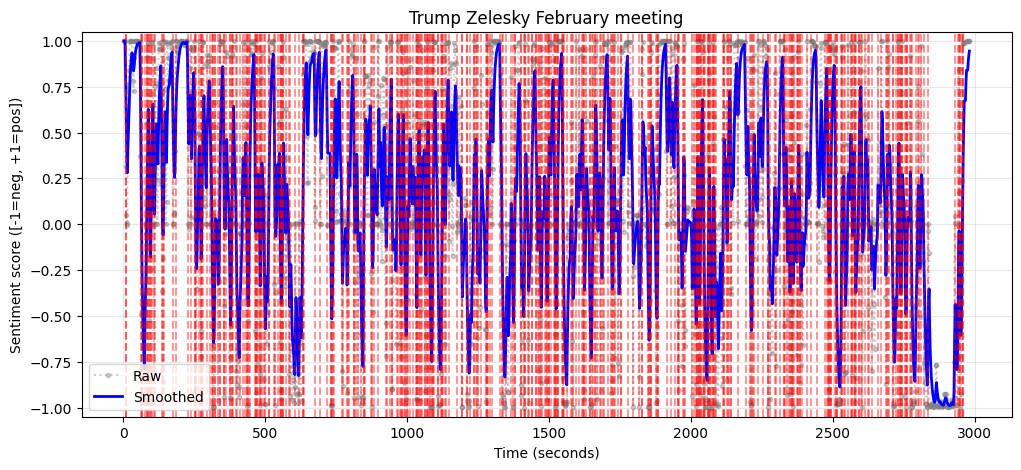

In [19]:
plot_sentiment_dynamics(video_sentiment, title="Trump Zelesky February meeting")

In [16]:
video_sentiment

{'bins': [{'t_start': 0.0,
   't_end': 2.0,
   't_center': 1.0,
   'score_raw': None,
   'score_smooth': None},
  {'t_start': 2.0,
   't_end': 4.0,
   't_center': 3.0,
   'score_raw': 0.9998476505279541,
   'score_smooth': 0.9998476505279541},
  {'t_start': 4.0,
   't_end': 6.0,
   't_center': 5.0,
   'score_raw': 0.9993894703401036,
   'score_smooth': 0.9997101964715989},
  {'t_start': 6.0,
   't_end': 8.0,
   't_center': 7.0,
   'score_raw': 0.999223917722702,
   'score_smooth': 0.9995643128469298},
  {'t_start': 8.0,
   't_end': 10.0,
   't_center': 9.0,
   'score_raw': 0.3163901609778401,
   'score_smooth': 0.7946120672862028},
  {'t_start': 10.0,
   't_end': 12.0,
   't_center': 11.0,
   'score_raw': 0.04991247938573362,
   'score_smooth': 0.5712021909160621},
  {'t_start': 12.0,
   't_end': 14.0,
   't_center': 13.0,
   'score_raw': 0.004499218463898115,
   'score_smooth': 0.40119129918041285},
  {'t_start': 14.0,
   't_end': 16.0,
   't_center': 15.0,
   'score_raw': -0.00219998

In [17]:
def plot_sentiment_dynamics(sent_result: dict, title: str = "Sentiment over time"):
    """
    Plot sentiment time series from sentiment_dynamics() output.
    X-axis = time (sec), Y-axis = sentiment score [-1..1].
    """
    bins = sent_result.get("bins", [])
    if not bins:
        print("No sentiment bins to plot.")
        return

    # Collect data
    t = [b["t_center"] for b in bins]
    raw = [b["score_raw"] for b in bins]
    smooth = [b["score_smooth"] for b in bins]

    plt.figure(figsize=(12, 5))
    # raw sentiment
    plt.plot(t, raw, label="Raw", alpha=0.4, color="gray", marker="o", markersize=3, linestyle="dotted")
    # smoothed sentiment
    plt.plot(t, smooth, label="Smoothed", color="blue", linewidth=2)

    # Mark detected shifts (if any)
    for sh in sent_result.get("shifts", []):
        plt.axvline(sh["t_center"], color="red", linestyle="--", alpha=0.4)

    plt.title(title)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Sentiment score ([-1=neg, +1=pos])")
    plt.ylim(-1.05, 1.05)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()
    

In [14]:
def sentiment_dynamics(

    transcript,                          # FetchedTranscript, list[dict], or our fetch_transcript(...) result
    analyzer: str = "vader",             # "vader" | "hf"
    hf_model: str = "distilbert-base-uncased-finetuned-sst-2-english",
    step_s: float = 2.0,                 # bin size in seconds
    smooth_ewm_alpha: float = 0.30,      # EWMA alpha (0..1), None to disable
    min_delta_for_shift: float = 0.20,   # flag changes where |Δ smoothed| >= this
) -> dict:
    """
    Convert a timed transcript into a per-time-bin sentiment series.
    Returns:
      {
        "bins": [
          {"t_start": float, "t_end": float, "t_center": float,
           "score_raw": float | None, "score_smooth": float | None}
        ],
        "snippets": [
          {"text": str, "start": float, "end": float, "duration": float, "score": float}
        ],
        "shifts": [ {"t_center": float, "delta": float} ]    # large sentiment jumps (post-smoothing)
      }
    Notes:
      - VADER 'compound' ∈ [-1,1]. HF signed score maps POS→+prob, NEG→-prob.
      - Overlap-weighted averaging per time bin for robust dynamics.
    """
    # ---------- 1) Normalize transcript into rows (text, start, end, duration) ----------
    def _to_rows(tr):
        # Accept our own fetch_transcript(...) dict
        if isinstance(tr, dict) and "timed_transcript" in tr:
            tr = tr["timed_transcript"]

        rows = []
        # Case A: list of dicts from youtube-transcript-api ({"text","start","duration"})
        if isinstance(tr, list):
            for s in tr:
                txt = s.get("text", "")
                st = float(s.get("start", 0.0))
                dur = float(s.get("duration", 0.0))
                rows.append({"text": txt, "start": st, "end": st + max(dur, 0.0), "duration": max(dur, 0.0)})
            return rows

        # Case B: FetchedTranscript(snippets=[FetchedTranscriptSnippet(...), ...])
        # We duck-type it: has attribute 'snippets', each with .text/.start/.duration
        snippets = getattr(tr, "snippets", None)
        if snippets is not None:
            for s in snippets:
                txt = getattr(s, "text", "")
                st = float(getattr(s, "start", 0.0))
                dur = float(getattr(s, "duration", 0.0))
                rows.append({"text": txt, "start": st, "end": st + max(dur, 0.0), "duration": max(dur, 0.0)})
            return rows

        # Last resort: try to parse repr-like strings (not recommended)
        raise TypeError("Unsupported transcript type. Pass list[{'text','start','duration'}], "
                        "a fetch_transcript(...) result, or a FetchedTranscript object.")

    rows = _to_rows(transcript)
    if not rows:
        return {"bins": [], "snippets": [], "shifts": []}

    # ---------- 2) Build sentiment scorer ----------
    def _make_vader():
        try:
            from nltk.sentiment import SentimentIntensityAnalyzer
        except Exception as e:
            raise ImportError("NLTK not installed. Install via `pip install nltk`.") from e
        # Ensure lexicon
        try:
            sia = SentimentIntensityAnalyzer()
        except Exception:
            import nltk
            nltk.download("vader_lexicon")
            from nltk.sentiment import SentimentIntensityAnalyzer as _SIA
            sia = _SIA()
        return lambda text: float(sia.polarity_scores(text or "")["compound"])

    def _make_hf(model_name: str):
        try:
            from transformers import pipeline
        except Exception as e:
            raise ImportError("Transformers not installed. Install via `pip install transformers`.") from e
        nlp = pipeline("sentiment-analysis", model=model_name)
        def _score(text: str) -> float:
            if not text:
                return 0.0
            out = nlp(text[:512])[0]  # keep it cheap
            label = (out.get("label") or "").upper()
            prob = float(out.get("score") or 0.0)
            # Map to signed score
            if "NEG" in label:
                return -prob
            if "POS" in label:
                return prob
            # Neutral/unknown → 0
            return 0.0
        return _score

    if analyzer.lower() == "vader":
        score_fn = _make_vader()
    elif analyzer.lower() == "hf":
        score_fn = _make_hf(hf_model)
    else:
        raise ValueError("analyzer must be 'vader' or 'hf'.")

    # ---------- 3) Score each snippet ----------
    for r in rows:
        r["score"] = score_fn(r["text"])

    # ---------- 4) Overlap-weighted binning ----------
    import math
    t_max = max(r["end"] for r in rows)
    step = float(step_s)
    if step <= 0:
        raise ValueError("step_s must be > 0")

    n_bins = int(math.ceil(t_max / step)) or 1
    sums = [0.0] * n_bins
    weights = [0.0] * n_bins

    for r in rows:
        s, e, sc = r["start"], r["end"], r["score"]
        if e <= s:
            continue
        b0 = int(math.floor(s / step))
        b1 = int(math.floor((max(e - 1e-9, s)) / step))
        for b in range(max(0, b0), min(n_bins - 1, b1) + 1):
            bin_s = b * step
            bin_e = (b + 1) * step
            overlap = max(0.0, min(e, bin_e) - max(s, bin_s))
            if overlap > 0:
                sums[b] += sc * overlap
                weights[b] += overlap

    # Raw averages per bin
    score_raw = [ (sums[i] / weights[i]) if weights[i] > 0 else None for i in range(n_bins) ]

    # ---------- 5) Optional EWMA smoothing ----------
    score_smooth = [None] * n_bins
    if smooth_ewm_alpha is not None:
        alpha = float(smooth_ewm_alpha)
        prev = None
        for i in range(n_bins):
            x = score_raw[i]
            if x is None:
                # Hold previous smoothed value (or None if none yet)
                score_smooth[i] = prev
            else:
                prev = x if prev is None else (alpha * x + (1 - alpha) * prev)
                score_smooth[i] = prev

    # ---------- 6) Change-point flags on smoothed deltas ----------
    shifts = []
    if score_smooth.count(None) != len(score_smooth):
        prev = None
        for i, val in enumerate(score_smooth):
            if val is None:
                continue
            if prev is not None:
                delta = val - prev
                if abs(delta) >= float(min_delta_for_shift):
                    t_center = (i + 0.5) * step
                    shifts.append({"t_center": t_center, "delta": float(delta)})
            prev = val

    # ---------- 7) Build bin timeline ----------
    bins = []
    for i in range(n_bins):
        t_s = i * step
        t_e = (i + 1) * step
        bins.append({
            "t_start": round(t_s, 3),
            "t_end": round(t_e, 3),
            "t_center": round((t_s + t_e) / 2.0, 3),
            "score_raw": None if score_raw[i] is None else float(score_raw[i]),
            "score_smooth": None if score_smooth[i] is None else float(score_smooth[i]),
        })

    return {
        "bins": bins,
        "snippets": rows,
        "shifts": shifts
    }